Aluno: Vinicius Santana da Silva Brandão

Disciplina: Introdução a Ciência de Dados

Dataset available at: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification<br/>
Execute as células em ordem para que funcionem corretamente.

Since this dataset has almost 2000 entries, and 20 features, the decision boundrie will not be plotted, the results will be evaluated based on the numeric outputs. 

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC




In [41]:
# Essa classe de importação de csv é de outro projeto que fiz.

class import_datasets:
    def __init__(self):
        self.train = 0
        self.test = 0
        self.validate = 0
    
    def load_train_data(self):
        dataset = pd.read_csv('train.csv')
        self.train_data = dataset
        return dataset

    def load_test_data(self):
        dataset = pd.read_csv('test.csv')
        # self.load_test_data = dataset
        return dataset

    def custom_train_val_test_split(self, X, y, test1_size, test_size, random_state):
        np.random.seed(random_state)
        shuffled_indices = np.random.permutation(len(X))
        
        val_set_size = int(len(X) * test1_size)
        test_set_size = int(len(X) * test_size)
        
        val_indices = shuffled_indices[:val_set_size]
        test_indices = shuffled_indices[val_set_size : val_set_size + test_set_size]
        train_indices = shuffled_indices[val_set_size + test_set_size:]
        
        X_train, X_val, X_test = X.iloc[train_indices], X.iloc[val_indices], X.iloc[test_indices]
        y_train, y_val, y_test = y.iloc[train_indices], y.iloc[val_indices], y.iloc[test_indices]

        self.X_train = X_train
        self.X_val = X_val
        self.X_test = X_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
        
        X_train = pd.DataFrame(X_train)
        
        return  X_train.values.tolist(), X_val.values.tolist(), X_test.values.tolist(),\
                y_train.values.tolist(), y_val.values.tolist(), y_test.values.tolist()



C:\Users\vini0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vini0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vini0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

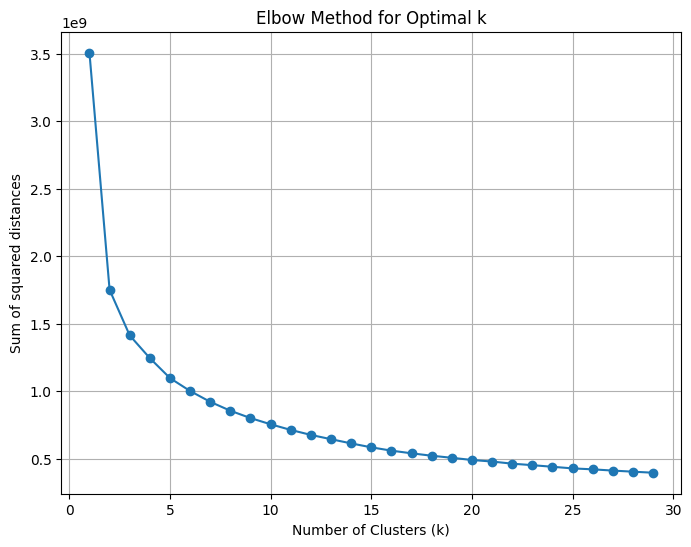

In [45]:
test1_size = 0.1
test_size = 0.1
random_state = 133

p = import_datasets()
train_data = p.load_train_data()
# test_data = p.load_test_data()
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

X_train, X_val, X_test, y_train, y_val, y_test = p.custom_train_val_test_split(X, y, test1_size, test_size, random_state)

clusters_range = range(1, 30)

inertia_values = []
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(train_data)  
    inertia_values.append(kmeans.inertia_) #the inertia is the sum of squared distances

plt.figure(figsize=(8, 6))
plt.plot(clusters_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()


Since after k = 5, the decrease slows down considerably, the chosen k will be 7, considering the elbow method.

In [46]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=7) 

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# RMS (Root Mean Squared)
rms = np.sqrt(np.mean((y_test - y_pred)**2))


print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"RMS: {rms}")




Accuracy: 0.9325
Confusion Matrix:
[[ 85   2   0   0]
 [  5  94   1   0]
 [  0   6 103   7]
 [  0   0   6  91]]
RMS: 0.2598076211353316


Now applying the svm

In [53]:
# Initialize SVM classificator with linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)  

# Treinar o classificador SVM
svm_classifier.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_svm = svm_classifier.predict(X_test)

# Avaliar o desempenho
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
svm_rms = np.sqrt(np.mean((y_test - y_pred_svm)**2))


print(f"Accuracy (SVM): {accuracy_svm}")
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)
print(f"SVM RMS: {svm_rms}")

Accuracy (SVM): 0.95
Confusion Matrix (SVM):
[[ 82   5   0   0]
 [  1  96   3   0]
 [  0   2 108   6]
 [  0   0   3  94]]
SVM RMS: 0.22360679774997896


Results:<br/>
    
    knn:
    Accuracy: 0.9325
    Confusion Matrix:
     85  2   0   0
     5   94  1   0
     0   6   103 7
     0   0   6   91
    RMS: 0.2598076211353316

    svm: 
    Accuracy (SVM): 0.95
    Confusion Matrix (SVM):
       82   5   0    0
       1    96  3    0
       0    2   108  6
       0    0   3    94
    SVM RMS: 0.22360679774997896

The chosen metrics for results were accuracy, confusion matrix and RMS error.<br/>
The three of them point to the svm being potentially better at solving this particular problem, but for this sample size (2000 samples) and  400 being analyzed, the difference is smaller than 2%, so this can be considered negligible and is subject to change in a case by case fluctuation, depending on the dataset split. Both got a rms error between 0.2 and 0.3, wich is high considering the magnitude of the data being classified (Close to the same order of magnitude). <br/>  Both methods were suficient to understand and predict with satisfactory accuracy and resulting in a useful and representative decision boundrie to the proposed problem.